In [1]:

library(data.table) 
library(ggplot2)
library(dplyr)
library(e1071)
library(rpart)
library(caret)

library(ggplot2)
library(stringr)
library(ISLR)

library(stats)

Warning message:
"package 'data.table' was built under R version 3.4.4"Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'dplyr' was built under R version 3.4.4"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice
Warning message:
"package 'stringr' was built under R version 3.4.4"

In [2]:
wm <- read.csv('data_clean.csv')
head(wm)
dim(wm)

Date,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown3_Imputed,MarkDown4_Imputed,MarkDown5_Imputed,TotalMarkDown_Imputed,Type,Size,Weekly_Sales_Week_Prev52,Weekly_Sales_Week_Prev1,Weekly_Sales_Week_Prev2,Weekly_Sales_Week_PercChange1
2010-02-05,1,FALSE,1,24924.50,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,A,151315,NA,NA,NA,NA
2010-02-05,1,FALSE,26,11737.12,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,A,151315,NA,NA,NA,NA
2010-02-05,1,FALSE,17,13223.76,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,A,151315,NA,NA,NA,NA
2010-02-05,1,FALSE,45,37.44,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,A,151315,NA,NA,NA,NA
2010-02-05,1,FALSE,28,1085.29,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,A,151315,NA,NA,NA,NA
2010-02-05,1,FALSE,79,46729.77,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,A,151315,NA,NA,NA,NA


[1] 421570     34

In [3]:
wm$Type <- as.character(wm$Type)
wm$Type[wm$Type=='A']<- '1'
wm$Type[wm$Type=='B']<- '2'
wm$Type[wm$Type=='C']<- '3'
#wm$Type[wm$Type=='B']<- "2"
#wm$Type[wm$Type=='C']<- "3"
wm$Type <- as.numeric(wm$Type)
head(wm)
dim(wm)

Date,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown3_Imputed,MarkDown4_Imputed,MarkDown5_Imputed,TotalMarkDown_Imputed,Type,Size,Weekly_Sales_Week_Prev52,Weekly_Sales_Week_Prev1,Weekly_Sales_Week_Prev2,Weekly_Sales_Week_PercChange1
2010-02-05,1,FALSE,1,24924.50,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,1,151315,NA,NA,NA,NA
2010-02-05,1,FALSE,26,11737.12,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,1,151315,NA,NA,NA,NA
2010-02-05,1,FALSE,17,13223.76,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,1,151315,NA,NA,NA,NA
2010-02-05,1,FALSE,45,37.44,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,1,151315,NA,NA,NA,NA
2010-02-05,1,FALSE,28,1085.29,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,1,151315,NA,NA,NA,NA
2010-02-05,1,FALSE,79,46729.77,42.31,2.572,NA,NA,NA,...,160.53,32403.87,5630.4,76351.07,1,151315,NA,NA,NA,NA


[1] 421570     34

In [4]:
wm %>%
  group_by(Date,Store)%>%
  summarise(Weekly_Sales=sum(Weekly_Sales),
            IsHoliday=any(IsHoliday),
            Temperature=mean(Temperature),
            Fuel_Price=mean(Fuel_Price),
            CPI=mean(CPI),
            Unemployment=mean(Unemployment),
            Type=mean(Type),
            Size=mean(Size),
            Week=mean(Week),
            IsHolidayFixed=any(IsHolidayFixed))->data.agg
head(data.agg)

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

Date,Store,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week,IsHolidayFixed
2010-02-05,1,1643690.9,FALSE,42.31,2.572,211.0964,8.106,1,151315,5,FALSE
2010-02-05,2,2136989.5,FALSE,40.19,2.572,210.7526,8.324,1,202307,5,FALSE
2010-02-05,3,461622.2,FALSE,45.71,2.572,214.4249,7.368,2,37392,5,FALSE
2010-02-05,4,2135143.9,FALSE,43.76,2.598,126.4421,8.623,1,205863,5,FALSE
2010-02-05,5,317173.1,FALSE,39.70,2.572,211.6540,6.566,2,34875,5,FALSE
2010-02-05,6,1652635.1,FALSE,40.43,2.572,212.6224,7.259,1,202505,5,FALSE


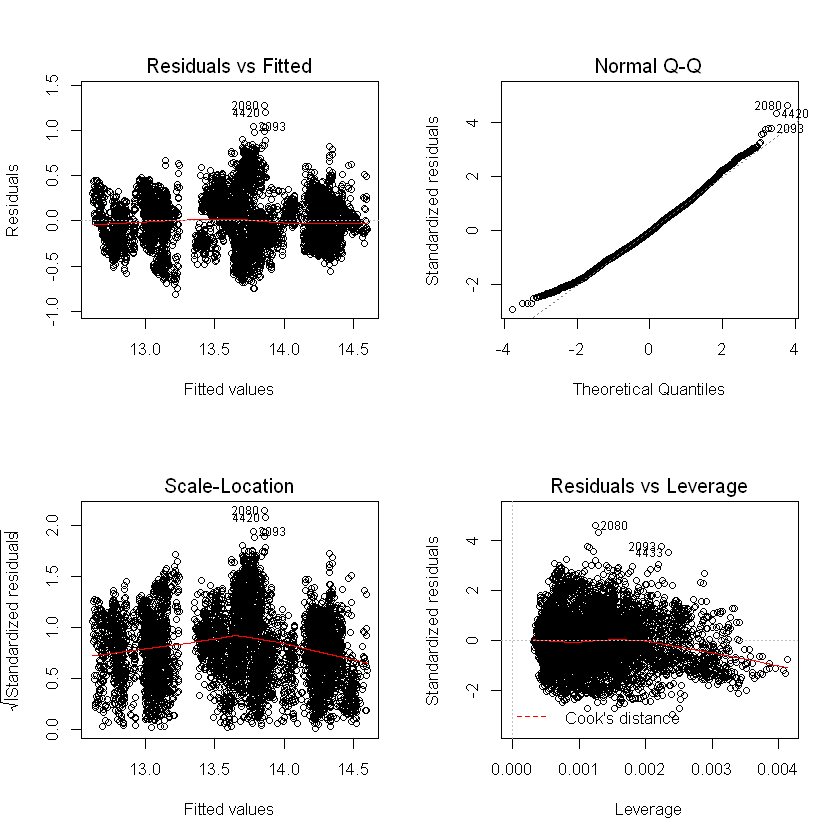

In [5]:
agg_model1 <- lm(log(Weekly_Sales) ~ Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed,data=data.agg)
par(mfrow=c(2,2))
plot(agg_model1)

In [7]:
anova(agg_model1 )
summary(agg_model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Temperature,1,19.060877,19.06087746,247.01990,1.195241e-54
CPI,1,8.585865,8.58586470,111.26872,8.389172e-26
Unemployment,1,20.692845,20.69284518,268.16943,4.414200e-59
Type,1,788.687891,788.68789083,10221.01980,0.000000e+00
Size,1,882.060737,882.06073671,11431.08746,0.000000e+00
Week,1,5.630972,5.63097209,72.97472,1.622029e-17
IsHolidayFixed,1,6.152638,6.15263810,79.73526,5.504553e-19
Residuals,6427,495.928701,0.07716333,NA,NA



Call:
lm(formula = log(Weekly_Sales) ~ Temperature + CPI + Unemployment + 
    Type + Size + Week + IsHolidayFixed, data = data.agg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81593 -0.19451 -0.01737  0.18137  1.28001 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.239e+01  3.559e-02 348.100  < 2e-16 ***
Temperature         3.799e-04  2.096e-04   1.812     0.07 .  
CPI                -1.077e-03  9.509e-05 -11.325  < 2e-16 ***
Unemployment       -1.440e-02  1.996e-03  -7.215 6.02e-13 ***
Type                1.733e-01  8.071e-03  21.475  < 2e-16 ***
Size                9.561e-06  8.943e-08 106.914  < 2e-16 ***
Week                1.571e-03  2.613e-04   6.012 1.93e-09 ***
IsHolidayFixedTRUE  7.654e-02  8.571e-03   8.929  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2778 on 6427 degrees of freedom
Multiple R-squared:  0.7773,	Adjusted R-squared:  0.777 
F-sta

In [8]:
dim(data.agg)

[1] 6435   12

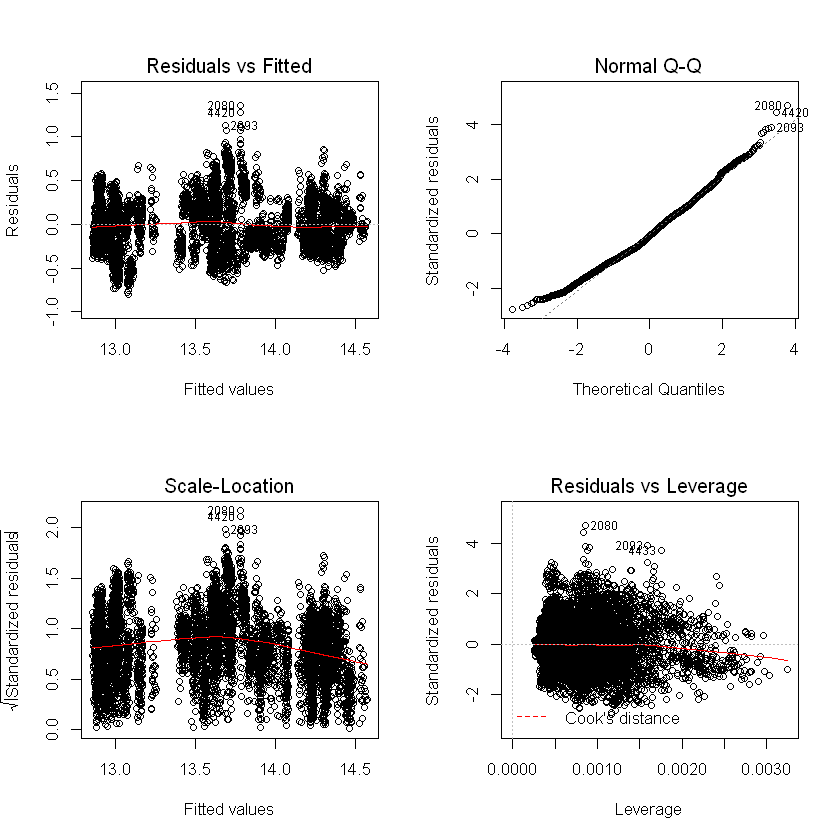

In [108]:
agg_model2 <- lm(log(Weekly_Sales) ~ Temperature + CPI + Unemployment + Size + IsHolidayFixed,
data=data.agg)
par(mfrow=c(2,2))
plot(agg_model2)

In [86]:
agg_model2
summary(agg_model2)


Call:
lm(formula = log(Weekly_Sales) ~ Temperature + Fuel_Price + CPI + 
    Unemployment + Size + IsHolidayFixed, data = data.agg)

Coefficients:
       (Intercept)         Temperature          Fuel_Price                 CPI  
         1.288e+01           6.305e-04          -9.242e-04          -1.220e-03  
      Unemployment                Size  IsHolidayFixedTRUE  
        -9.428e-03           8.060e-06           8.788e-02  



Call:
lm(formula = log(Weekly_Sales) ~ Temperature + Fuel_Price + CPI + 
    Unemployment + Size + IsHolidayFixed, data = data.agg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.80271 -0.20848 -0.02216  0.19916  1.35641 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.288e+01  4.258e-02 302.494  < 2e-16 ***
Temperature         6.305e-04  2.109e-04   2.989  0.00281 ** 
Fuel_Price         -9.242e-04  8.158e-03  -0.113  0.90981    
CPI                -1.220e-03  1.010e-04 -12.072  < 2e-16 ***
Unemployment       -9.428e-03  2.063e-03  -4.570 4.97e-06 ***
Size                8.060e-06  5.742e-08 140.375  < 2e-16 ***
IsHolidayFixedTRUE  8.788e-02  8.622e-03  10.192  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2884 on 6428 degrees of freedom
Multiple R-squared:  0.7599,	Adjusted R-squared:  0.7597 
F-statistic:  3391 on 6 and 6428 DF,  p-value: < 2.2e-16


In [87]:
anova(agg_model2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Temperature,1,19.060877,1.906088e+01,229.20065,6.668635e-51
Fuel_Price,1,2.356106,2.356106e+00,28.33138,1.056864e-07
CPI,1,7.159325,7.159325e+00,86.08848,2.304800e-20
Unemployment,1,19.921142,1.992114e+01,239.54503,4.442560e-53
Size,1,1635.095643,1.635096e+03,19661.47557,0.000000e+00
IsHolidayFixed,1,8.639478,8.639478e+00,103.88682,3.270831e-24
Residuals,6428,534.567955,8.316241e-02,NA,NA


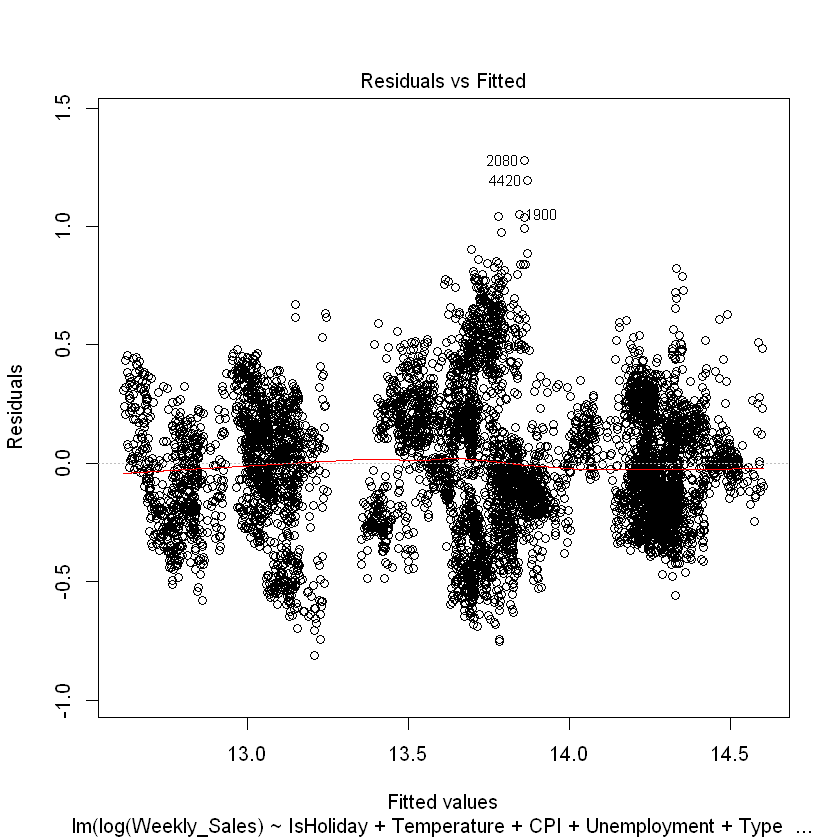

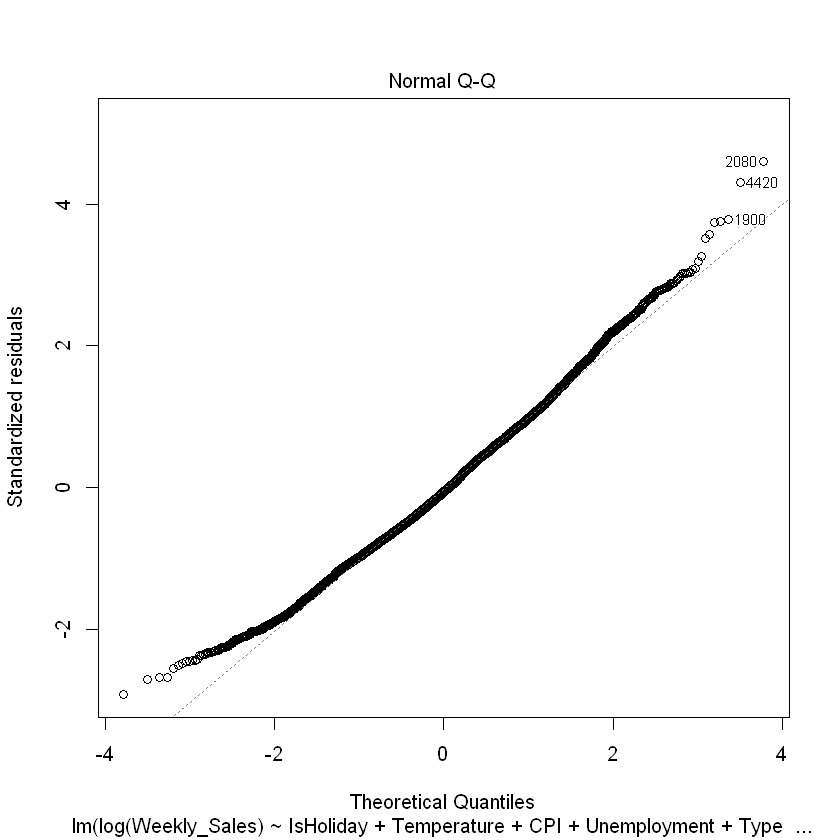

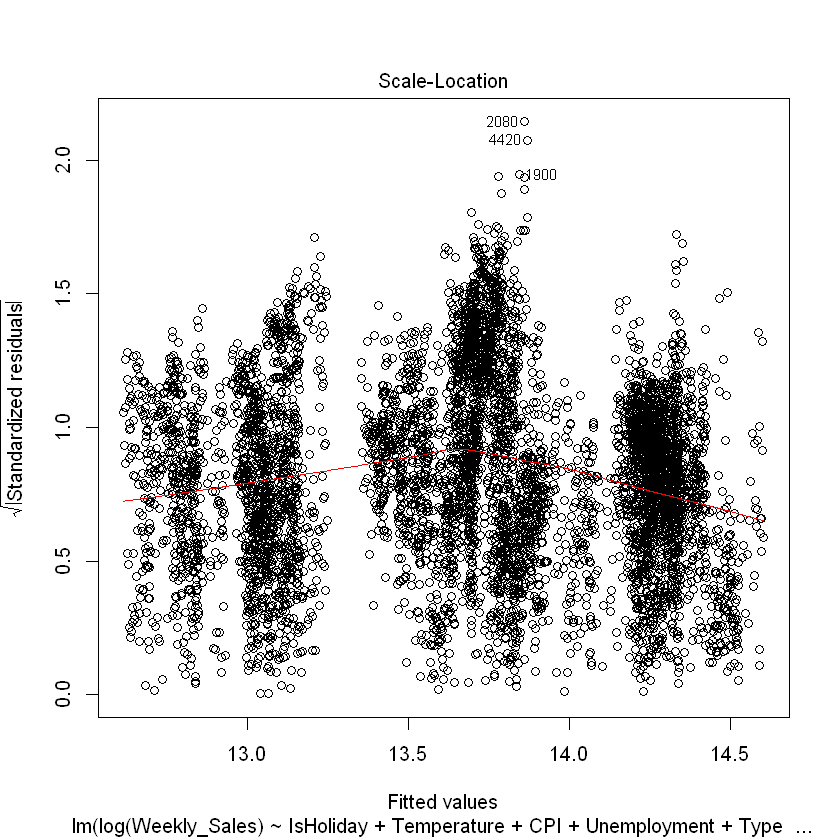

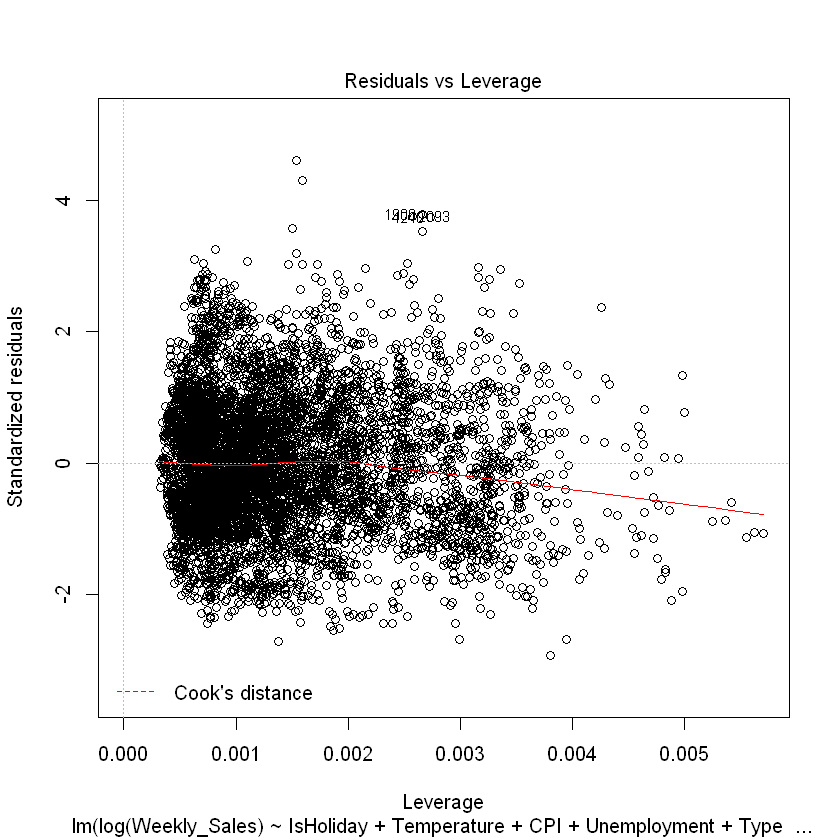

In [7]:
agg_model3 <- lm(log(Weekly_Sales) ~ IsHoliday + Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed,
data=data.agg)
#par(mfrow=c(2,2))
plot(agg_model3)

In [12]:
anova(agg_model3)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
IsHoliday,1,1.595824,1.59582407,20.67886,5.530877e-06
Temperature,1,17.817093,17.81709259,230.87578,2.962172e-51
CPI,1,8.682341,8.68234119,112.50670,4.541590e-26
Unemployment,1,20.952862,20.95286195,271.50941,8.839584e-60
Type,1,788.950040,788.95004020,10223.29852,0.000000e+00
Size,1,882.922411,882.92241142,11441.00249,0.000000e+00
Week,1,4.705929,4.70592893,60.97993,6.688710e-15
IsHolidayFixed,1,5.268233,5.26823267,68.26632,1.719160e-16
Residuals,6426,495.905793,0.07717177,NA,NA


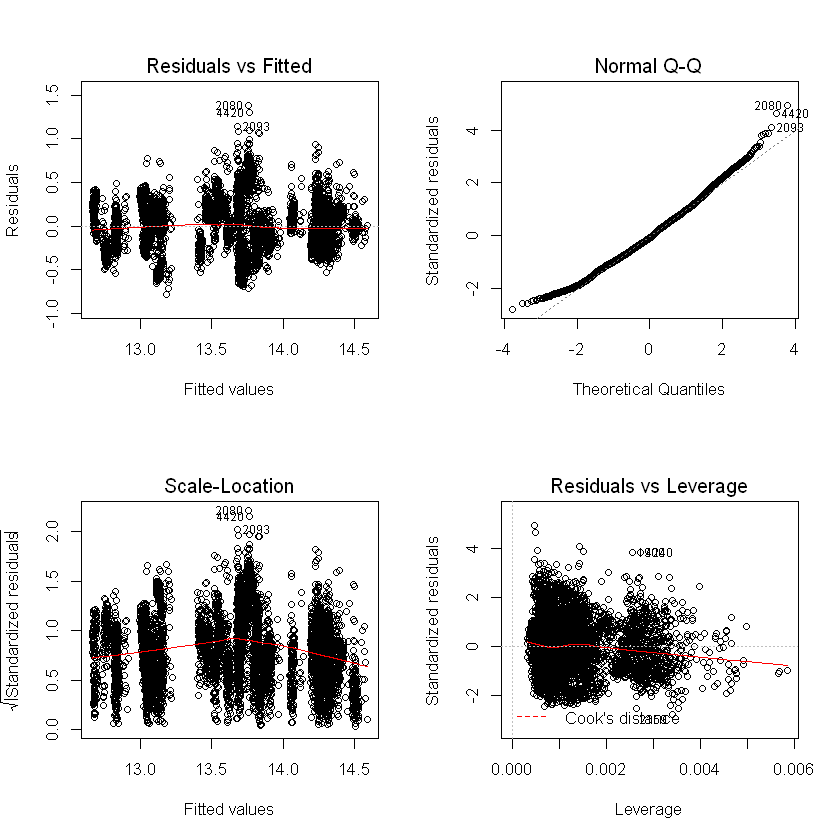

In [8]:
agg_model4 <- lm(log(Weekly_Sales) ~ IsHoliday + Temperature + Fuel_Price + CPI + Unemployment + Type + Size, data=data.agg)
par(mfrow=c(2,2))
plot(agg_model4)

In [14]:
anova(agg_model4)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
IsHoliday,1,1.595824,1.59582407,20.28056,6.805832e-06
Temperature,1,17.817093,17.81709259,226.42881,2.558535e-50
Fuel_Price,1,2.469416,2.46941608,31.38261,2.206464e-08
CPI,1,7.215033,7.21503309,91.69236,1.409843e-21
Unemployment,1,20.143338,20.14333753,255.99193,1.567397e-56
Type,1,789.609514,789.60951380,10034.76512,0.000000e+00
Size,1,882.226429,882.22642934,11211.78867,0.000000e+00
Residuals,6427,505.723880,0.07868739,NA,NA


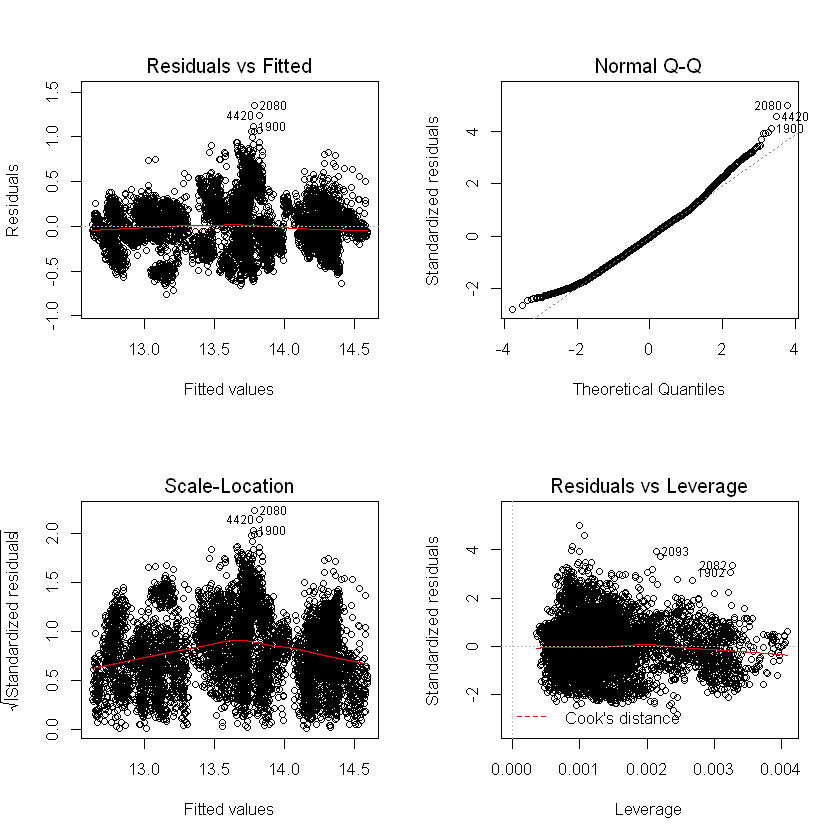

In [22]:
agg_model5 <- lm(log(Weekly_Sales) ~ Temperature + Fuel_Price + CPI +  Unemployment + Type + Size + Week  
                       + CPI*Unemployment,
                       data=data.agg)
par(mfrow=c(2,2))
plot(agg_model5)

In [23]:
summary(agg_model5)


Call:
lm(formula = log(Weekly_Sales) ~ Temperature + Fuel_Price + CPI + 
    Unemployment + Type + Size + Week + CPI * Unemployment, data = data.agg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76128 -0.18662 -0.01123  0.17032  1.35150 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.379e+01  7.980e-02 172.836   <2e-16 ***
Temperature       2.680e-04  2.008e-04   1.335    0.182    
Fuel_Price        1.246e-02  7.746e-03   1.608    0.108    
CPI              -1.084e-02  4.868e-04 -22.265   <2e-16 ***
Unemployment     -1.981e-01  9.207e-03 -21.519   <2e-16 ***
Type              1.540e-01  7.928e-03  19.428   <2e-16 ***
Size              9.427e-06  8.743e-08 107.820   <2e-16 ***
Week              2.080e-03  2.475e-04   8.407   <2e-16 ***
CPI:Unemployment  1.304e-03  6.355e-05  20.526   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2708 on 6426 degrees of freedom
Mul

In [16]:
anova(agg_model5)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Temperature,1,19.060877,19.06087746,259.98229,2.286062e-57
Fuel_Price,1,2.356106,2.35610556,32.13628,1.499693e-08
CPI,1,7.159325,7.15932533,97.65016,7.262046e-23
Unemployment,1,19.921142,19.92114150,271.71593,8.002921e-60
Type,1,789.293701,789.29370065,10765.63170,0.000000e+00
Size,1,881.508652,881.50865190,12023.40457,0.000000e+00
Week,1,5.483841,5.48384070,74.79726,6.511051e-18
CPI:Unemployment,1,30.887881,30.88788081,421.29761,9.833932e-91
Residuals,6426,471.129002,0.07331606,NA,NA


In [ ]:
summary(lm(log(Weekly_Sales) ~ Temperature + Fuel_Price + CPI + Unemployment + Size + factor(Type)+ IsHolidayFixed,
data=data.agg))

In [109]:
#DFBETAS
#DFFITS
#COOK'S DISTANCE
dfbeta1 = dfbetas(agg_model1)
dfbeta2 = dfbetas(agg_model2)
dfbeta3 = dfbetas(agg_model3)
dfbeta4 = dfbetas(agg_model4)
dfbeta5 = dfbetas(agg_model5)
#dfbeta1

In [ ]:
ones=rep(1,nrow(data.agg))
x=cbind(ones,data.agg$Temperature,data.agg$CPI,data.agg$Unemployment,data.agg$Type,
        data.agg$Size,data.agg$Week,data.agg$IsHolidayFixed)
y=log(data.agg$Weekly_Sales)
h=x%*%solve(t(x)%*%x)%*%t(x)
i=diag(nrow(data.agg))
e=(i-h)%*%y
hii=diag(h)
mse=anova(agg_model1)$Mean[8]
sse=anova(agg_model1)$Sum[8]
ti=e*(sqrt((nrow(data.agg)-4-1)/((sse*(1-hii))-(e^2))))
dffits1=ti*sqrt(hii/(1-hii))
cookdist1=((e^2)/(4*mse))*(hii/((1-hii)^2))
#Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed

In [ ]:
test= which(abs(ti)> qt(1-((0.1)/(2*nrow(data.agg))), (nrow(data.agg)-8-1)) )
diagres = which(hii > (2*8/nrow(data.agg)))

test

diagres

In [ ]:
which(abs(cookdist1)>qf(1/nrow(data.agg),8,nrow(data.agg)-8))

In [ ]:
which(abs(cookdist1)>qf(1/nrow(data.agg),8,nrow(data.agg)-8))
dffitres = which(abs(dffits1)>(2*sqrt(8/nrow(data.agg))))
#which(test == diagres)
dfbetares = which(abs(dfbeta1)>(2/sqrt(nrow(data.agg))))

dffitres

dfbetares


In [111]:
ones=rep(1,nrow(data.agg))
x=cbind(ones,data.agg$Temperature, data.agg$CPI,data.agg$Unemployment,
        data.agg$Size,data.agg$IsHolidayFixed)
y=log(data.agg$Weekly_Sales)
h=x%*%solve(t(x)%*%x)%*%t(x)
i=diag(nrow(data.agg))
e=(i-h)%*%y
hii=diag(h)
mse=anova(agg_model1)$Mean[6]
sse=anova(agg_model1)$Sum[6]
ti=e*(sqrt((nrow(data.agg)-4-1)/((sse*(1-hii))-(e^2))))
dffits2=ti*sqrt(hii/(1-hii))
cookdist2=((e^2)/(4*mse))*(hii/((1-hii)^2))
#Temperature + Fuel_Price + CPI + Unemployment + Type + Size + Week + IsHolidayFixed

In [112]:
test= which(abs(ti)> qt(1-((0.1)/(2*nrow(data.agg))), (nrow(data.agg)-6-1)) )
diagres = which(hii > (2*6/nrow(data.agg)))


which(test ==2080)
which(test ==4420)
which(test ==4433)
which(test ==2093)
which(test ==1900)

print("Hidden Extrapolation")
which(diagres ==2080)
which(diagres ==4420)
which(diagres ==4433)
which(diagres ==2093)
which(diagres ==1900)

[1] 1489

[1] 3114

[1] 3127

[1] 1502

[1] 1376

[1] "Hidden Extrapolation"


integer(0)

integer(0)

integer(0)

integer(0)

integer(0)

In [113]:
which(abs(cookdist2)>qf(1/nrow(data.agg),6,nrow(data.agg)-6))

integer(0)

In [114]:
dffitres = which(abs(dffits2)>(2*sqrt(6/nrow(data.agg))))
#which(test == diagres)
dfbetares = which(abs(dfbeta2)>(2/sqrt(nrow(data.agg))))

which(dffitres ==2080)
which(dffitres ==4420)
which(dffitres ==4433)
which(dffitres ==2093)
which(dffitres ==1900)
print("dfbetaresult")
print("dfbeta2080")
which(dfbetares==2080)
print("dfbeta4420")
which(dfbetares ==4420)
print("dfbeta4433")
which(dfbetares ==4433)
print("dfbeta2093")
which(dfbetares ==2093)
print("dfbeta1900")
which(dfbetares ==1900)

[1] 1807

[1] 3792

[1] 3805

[1] 1820

[1] 1651

[1] "dfbetaresult"
[1] "dfbeta2080"


integer(0)

[1] "dfbeta4420"


[1] 343

[1] "dfbeta4433"


[1] 349

[1] "dfbeta2093"


[1] 131

[1] "dfbeta1900"


integer(0)

In [ ]:
ones=rep(1,nrow(data.agg))
x=cbind(ones,data.agg$Temperature, data.agg$IsHoliday, data.agg$CPI,data.agg$Unemployment,data.agg$Type,
        data.agg$Size,data.agg$Week,data.agg$IsHolidayFixed)
y=log(data.agg$Weekly_Sales)
h=x%*%solve(t(x)%*%x)%*%t(x)
i=diag(nrow(data.agg))
e=(i-h)%*%y
hii=diag(h)
mse=anova(agg_model1)$Mean[9]
sse=anova(agg_model1)$Sum[9]
ti=e*(sqrt((nrow(data.agg)-4-1)/((sse*(1-hii))-(e^2))))
dffits3=ti*sqrt(hii/(1-hii))
cookdist3=((e^2)/(4*mse))*(hii/((1-hii)^2))
#IsHoliday + Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed

In [ ]:
test= which(abs(ti)> qt(1-((0.1)/(2*nrow(data.agg))), (nrow(data.agg)-9-1)) )
diagres = which(hii > (2*9/nrow(data.agg)))

test

diagres

In [ ]:
which(abs(cookdist3)>qf(1/nrow(data.agg),9,nrow(data.agg)-9))

In [ ]:
dffitres = which(abs(dffits3)>(2*sqrt(9/nrow(data.agg))))
#which(test == diagres)
dfbetares = which(abs(dfbeta3)>(2/sqrt(nrow(data.agg))))

dffitres

dfbetares

In [ ]:
ones=rep(1,nrow(data.agg))
x=cbind(ones,data.agg$IsHoliday,data.agg$Temperature,data.agg$Fuel_Price, data.agg$CPI,
        data.agg$Unemployment,data.agg$Type, data.agg$Size)
y=log(data.agg$Weekly_Sales)
h=x%*%solve(t(x)%*%x)%*%t(x)
i=diag(nrow(data.agg))
e=(i-h)%*%y
hii=diag(h)
mse=anova(agg_model1)$Mean[8]
sse=anova(agg_model1)$Sum[8]
ti=e*(sqrt((nrow(data.agg)-4-1)/((sse*(1-hii))-(e^2))))
dffits4=ti*sqrt(hii/(1-hii))
cookdist4=((e^2)/(4*mse))*(hii/((1-hii)^2))
#IsHoliday + Temperature + Fuel_Price + CPI + Unemployment + Type + Size

In [ ]:
test= which(abs(ti)> qt(1-((0.1)/(2*nrow(data.agg))), (nrow(data.agg)-8-1)) )
diagres = which(hii > (2*8/nrow(data.agg)))

test

diagres

In [ ]:
which(abs(cookdist4)>qf(1/nrow(data.agg),8,nrow(data.agg)-8))

In [ ]:
dffitres = which(abs(dffits4)>(2*sqrt(8/nrow(data.agg))))
#which(test == diagres)
dfbetares = which(abs(dfbeta4)>(2/sqrt(nrow(data.agg))))

dffitres

dfbetares

In [ ]:
ones=rep(1,nrow(data.agg))
x=cbind(ones,data.agg$Temperature, data.agg$Fuel_Price, data.agg$CPI,data.agg$Unemployment,data.agg$Type,
        data.agg$Size,data.agg$Week,data.agg$CPI*data.agg$Unemployment)
y=log(data.agg$Weekly_Sales)
h=x%*%solve(t(x)%*%x)%*%t(x)
i=diag(nrow(data.agg))
e=(i-h)%*%y
hii=diag(h)
mse=anova(agg_model1)$Mean[9]
sse=anova(agg_model1)$Sum[9]
ti=e*(sqrt((nrow(data.agg)-4-1)/((sse*(1-hii))-(e^2))))
dffits5=ti*sqrt(hii/(1-hii))
cookdist5=((e^2)/(4*mse))*(hii/((1-hii)^2))
#Temperature + Fuel_Price + CPI +  Unemployment + Type + Size + Week  + CPI*Unemployment

In [128]:
library(car)
vif1 = vif(agg_model1)
vif2 = vif(agg_model2)
vif3 = vif(agg_model3)
vif4 = vif(agg_model4)
vif5 = vif(agg_model5)

In [129]:
vif1
vif2
vif3
vif4
vif5

Temperature            CPI   Unemployment           Type           Size 
      1.246281       1.167786       1.169049       2.693383       2.656355 
          Week IsHolidayFixed 
      1.136835       1.132530

Temperature            CPI   Unemployment           Size IsHolidayFixed 
      1.131795       1.159496       1.141662       1.015986       1.060304

IsHoliday    Temperature            CPI   Unemployment           Type 
      1.312237       1.252990       1.168158       1.169547       2.693418 
          Size           Week IsHolidayFixed 
      2.656456       1.142157       1.402660

IsHoliday  Temperature   Fuel_Price          CPI Unemployment         Type 
    1.029384     1.138956     1.086741     1.223584     1.181032     2.698416 
        Size 
    2.659482

Temperature       Fuel_Price              CPI     Unemployment 
        1.204196         1.109501        32.214441        26.177833 
            Type             Size             Week CPI:Unemployment 
        2.735332         2.672377         1.072737        40.279909

In [ ]:
#appropriate Bonferroni critical value is t(1-0.1/2(46); 46-4-1), or t(0.998913;41)
qt(1-((0.1)/(2*nrow(data.agg))), (nrow(data.agg)-8-1))
which(abs(ti)> qt(1-((0.1)/(2*nrow(agg_model1))), (nrow(agg_model1)-8-1)) )

In [ ]:
2*8/nrow(agg_model1) #p=8 parameters

In [ ]:
patient.lm11 <- lm(y ~ x1+x2+x3,data=patient[-11,])
patient.lm17 <- lm(y ~ x1+x2+x3,data=patient[-17,])
patient.lm27 <- lm(y ~ x1+x2+x3,data=patient[-27,])
amodel1.y <- agg_model1$fit
amodel1.y11 <- patient.x %*% patient.lm11$coeff
> patient.y17 <- patient.x %*% patient.lm17$coeff
> patient.y27 <- patient.x %*% patient.lm27$coeff
> sum(abs((patient.y11-patient.y)/patient.y))*100/46
[1] 1.10094
> sum(abs((patient.y17-patient.y)/patient.y))*100/46

In [115]:
p2080=data.agg[-2080,]
m1p2080.lm=lm(log(Weekly_Sales) ~ Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed,data=p2080)
m2p2080.lm=lm(log(Weekly_Sales) ~ Temperature + CPI + Unemployment + Size + IsHolidayFixed
              ,data=p2080)
m3p2080.lm=lm(log(Weekly_Sales) ~ IsHoliday + Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed,
              data=p2080)
m4p2080.lm=lm(log(Weekly_Sales) ~ IsHoliday + Temperature + Fuel_Price + CPI + Unemployment + Type + Size, data=p2080)

In [116]:
p4420=data.agg[-4420,]
m1p4420.lm=lm(log(Weekly_Sales) ~ Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed,data=p4420)
m2p4420.lm=lm(log(Weekly_Sales) ~ Temperature + CPI + Unemployment + Size + IsHolidayFixed
              ,data=p4420)
m3p4420.lm=lm(log(Weekly_Sales) ~ IsHoliday + Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed,
              data=p4420)
m4p4420.lm=lm(log(Weekly_Sales) ~ IsHoliday + Temperature + Fuel_Price + CPI + Unemployment + Type + Size, data=p4420)

In [117]:
p4433=data.agg[-4433,]
m1p4433.lm=lm(log(Weekly_Sales) ~ Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed,data=p4433)
m2p4433.lm=lm(log(Weekly_Sales) ~ Temperature + CPI + Unemployment + Size + IsHolidayFixed
              ,data=p4433)
m3p4433.lm=lm(log(Weekly_Sales) ~ IsHoliday + Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed,
              data=p4433)
m4p4433.lm=lm(log(Weekly_Sales) ~ IsHoliday + Temperature + Fuel_Price + CPI + Unemployment + Type + Size, data=p4433)

In [118]:
p2093=data.agg[-2093,]
m1p2093.lm=lm(log(Weekly_Sales) ~ Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed,data=p2093)
m2p2093.lm=lm(log(Weekly_Sales) ~ Temperature + CPI + Unemployment + Size + IsHolidayFixed
              ,data=p2093)
m3p2093.lm=lm(log(Weekly_Sales) ~ IsHoliday + Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed,
              data=p2093)
m4p2093.lm=lm(log(Weekly_Sales) ~ IsHoliday + Temperature + Fuel_Price + CPI + Unemployment + Type + Size, data=p2093)

In [119]:
p1900=data.agg[-1900,]
m1p1900.lm=lm(log(Weekly_Sales) ~ Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed,data=p1900)
m2p1900.lm=lm(log(Weekly_Sales) ~ Temperature + CPI + Unemployment+ Size+ IsHolidayFixed
              ,data=p1900)
m3p1900.lm=lm(log(Weekly_Sales) ~ IsHoliday + Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed,
              data=p1900)
m4p1900.lm=lm(log(Weekly_Sales) ~ IsHoliday + Temperature + Fuel_Price + CPI + Unemployment + Type + Size, data=p1900)

In [120]:
mrep1.lm=lm(log(Weekly_Sales) ~ Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed,data=data.agg)
mrep2.lm=lm(log(Weekly_Sales) ~ Temperature + CPI + Unemployment+ Size+ IsHolidayFixed,
            data=data.agg)
mrep3.lm=lm(log(Weekly_Sales) ~ IsHoliday + Temperature + CPI + Unemployment + Type + Size + Week + IsHolidayFixed,
            data=data.agg)
mrep4.lm=lm(log(Weekly_Sales) ~ IsHoliday + Temperature + Fuel_Price + CPI + Unemployment + Type + Size, data=data.agg)
datarep=data.agg

amodel1.y <- agg_model1$fit
amodel2.y <- agg_model2$fit
amodel3.y <- agg_model3$fit
amodel4.y <- agg_model4$fit

In [121]:
data.aggint = rep(1,nrow(data.agg))
data.aggx1 = cbind(data.aggint,data.agg$Temperature,data.agg$CPI,data.agg$Unemployment,data.agg$Type,
        data.agg$Size,data.agg$Week,data.agg$IsHolidayFixed)
data.aggx2 = cbind(data.aggint,data.agg$Temperature, data.agg$CPI,data.agg$Unemployment,
        data.agg$Size,data.agg$IsHolidayFixed)
data.aggx3 = cbind(data.aggint, data.agg$IsHoliday, data.agg$Temperature, data.agg$CPI,data.agg$Unemployment,data.agg$Type,
        data.agg$Size,data.agg$Week,data.agg$IsHolidayFixed)
data.aggx4 = cbind(data.aggint,data.agg$IsHoliday,data.agg$Temperature,data.agg$Fuel_Price, data.agg$CPI,
        data.agg$Unemployment,data.agg$Type, data.agg$Size)


In [122]:
dataagg.y2080.1 <- data.aggx1 %*% m1p2080.lm$coeff
dataagg.y2080.2 <- data.aggx2 %*% m2p2080.lm$coeff
dataagg.y2080.3 <- data.aggx3 %*% m3p2080.lm$coeff
dataagg.y2080.4 <- data.aggx4 %*% m4p2080.lm$coeff

dataagg.y4420.1 <- data.aggx1 %*% m1p4420.lm$coeff
dataagg.y4420.2 <- data.aggx2 %*% m2p4420.lm$coeff
dataagg.y4420.3 <- data.aggx3 %*% m3p4420.lm$coeff
dataagg.y4420.4 <- data.aggx4 %*% m4p4420.lm$coeff

dataagg.y4433.1 <- data.aggx1 %*% m1p4433.lm$coeff
dataagg.y4433.2 <- data.aggx2 %*% m2p4433.lm$coeff
dataagg.y4433.3 <- data.aggx3 %*% m3p4433.lm$coeff
dataagg.y4433.4 <- data.aggx4 %*% m4p4433.lm$coeff

dataagg.y2093.1 <- data.aggx1 %*% m1p2093.lm$coeff
dataagg.y2093.2 <- data.aggx2 %*% m2p2093.lm$coeff
dataagg.y2093.3 <- data.aggx3 %*% m3p2093.lm$coeff
dataagg.y2093.4 <- data.aggx4 %*% m4p2093.lm$coeff

dataagg.y1900.1 <- data.aggx1 %*% m1p1900.lm$coeff
dataagg.y1900.2 <- data.aggx2 %*% m2p1900.lm$coeff
dataagg.y1900.3 <- data.aggx3 %*% m3p1900.lm$coeff
dataagg.y1900.4 <- data.aggx4 %*% m4p1900.lm$coeff


In [123]:
sum((abs((dataagg.y2080.1-amodel1.y)/amodel1.y))*100)/nrow(data.agg)
sum((abs((dataagg.y2080.2-amodel2.y)/amodel2.y))*100)/nrow(data.agg)
sum((abs((dataagg.y2080.3-amodel3.y)/amodel3.y))*100)/nrow(data.agg)
sum((abs((dataagg.y2080.4-amodel4.y)/amodel4.y))*100)/nrow(data.agg)

[1] 0.003143175

[1] 0.002834828

[1] 0.003361312

[1] 0.002240702

In [124]:
sum((abs((dataagg.y4420.1-amodel1.y)/amodel1.y))*100)/nrow(data.agg)
sum((abs((dataagg.y4420.2-amodel2.y)/amodel2.y))*100)/nrow(data.agg)
sum((abs((dataagg.y4420.3-amodel3.y)/amodel3.y))*100)/nrow(data.agg)
sum((abs((dataagg.y4420.4-amodel4.y)/amodel4.y))*100)/nrow(data.agg)

[1] 0.002943755

[1] 0.002614531

[1] 0.003164023

[1] 0.002126976

In [125]:
sum((abs((dataagg.y4433.1-amodel1.y)/amodel1.y))*100)/nrow(data.agg)
sum((abs((dataagg.y4433.2-amodel2.y)/amodel2.y))*100)/nrow(data.agg)
sum((abs((dataagg.y4433.3-amodel3.y)/amodel3.y))*100)/nrow(data.agg)
sum((abs((dataagg.y4433.4-amodel4.y)/amodel4.y))*100)/nrow(data.agg)

[1] 0.003275029

[1] 0.003126265

[1] 0.003455171

[1] 0.002948777

In [126]:
sum((abs((dataagg.y2093.1-amodel1.y)/amodel1.y))*100)/nrow(data.agg)
sum((abs((dataagg.y2093.2-amodel2.y)/amodel2.y))*100)/nrow(data.agg)
sum((abs((dataagg.y2093.3-amodel3.y)/amodel3.y))*100)/nrow(data.agg)
sum((abs((dataagg.y2093.4-amodel4.y)/amodel4.y))*100)/nrow(data.agg)

[1] 0.003422691

[1] 0.003197795

[1] 0.003623712

[1] 0.003082907

In [127]:
sum((abs((dataagg.y1900.1-amodel1.y)/amodel1.y))*100)/nrow(data.agg)
sum((abs((dataagg.y1900.2-amodel2.y)/amodel2.y))*100)/nrow(data.agg)
sum((abs((dataagg.y1900.3-amodel3.y)/amodel3.y))*100)/nrow(data.agg)
sum((abs((dataagg.y1900.4-amodel4.y)/amodel4.y))*100)/nrow(data.agg)

[1] 0.002429849

[1] 0.00232895

[1] 0.002707963

[1] 0.002605537

In [43]:
#may not use
datarep$EstimY=psrep.lm$coeff[1]+(psrep.lm$coeff[2]*psrep$Age)+(psrep.lm$coeff[3]*psrep$IllSev)+(psrep.lm$coeff[4]*psrep$AnxLvl)
datarep$EstimY11=ps11.lm$coeff[1]+(ps11.lm$coeff[2]*psrep$Age)+(ps11.lm$coeff[3]*psrep$IllSev)+(ps11.lm$coeff[4]*psrep$AnxLvl)
datarep$EstimY17=ps17.lm$coeff[1]+(ps17.lm$coeff[2]*psrep$Age)+(ps17.lm$coeff[3]*psrep$IllSev)+(ps17.lm$coeff[4]*psrep$AnxLvl)
datarep$EstimY27=ps27.lm$coeff[1]+(ps27.lm$coeff[2]*psrep$Age)+(ps27.lm$coeff[3]*psrep$IllSev)+(ps27.lm$coeff[4]*psrep$AnxLvl)
sum(((abs(datarep$EstimY11-datarep$EstimY)/datarep$EstimY)))*100)/nrow(data.agg)

ERROR: Error in parse(text = x, srcfile = src): <text>:6:65: unexpected ')'
5: datarep$EstimY27=ps27.lm$coeff[1]+(ps27.lm$coeff[2]*psrep$Age)+(ps27.lm$coeff[3]*psrep$IllSev)+(ps27.lm$coeff[4]*psrep$AnxLvl)
6: sum(((abs(datarep$EstimY11-datarep$EstimY)/datarep$EstimY)))*100)
                                                                   ^


In [30]:
1-((0.1)/(2*nrow(data.agg)))

[1] 0.9999922

In [33]:
1/6435

[1] 0.0001554002

In [73]:
noout=data.agg[-c(2080,4433,2093,1900,4420),]
noout.lm=lm(log(Weekly_Sales) ~ Temperature + Fuel_Price + CPI + Unemployment + Size + IsHolidayFixed
              ,data=noout)
summary(noout.lm)


Call:
lm(formula = log(Weekly_Sales) ~ Temperature + Fuel_Price + CPI + 
    Unemployment + Size + IsHolidayFixed, data = noout)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79737 -0.20811 -0.02166  0.19901  1.11268 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.287e+01  4.233e-02 304.004  < 2e-16 ***
Temperature         6.433e-04  2.096e-04   3.069  0.00216 ** 
Fuel_Price         -5.904e-04  8.107e-03  -0.073  0.94194    
CPI                -1.190e-03  1.004e-04 -11.843  < 2e-16 ***
Unemployment       -9.024e-03  2.051e-03  -4.400  1.1e-05 ***
Size                8.064e-06  5.706e-08 141.327  < 2e-16 ***
IsHolidayFixedTRUE  8.423e-02  8.576e-03   9.822  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2865 on 6423 degrees of freedom
Multiple R-squared:  0.7623,	Adjusted R-squared:  0.7621 
F-statistic:  3434 on 6 and 6423 DF,  p-value: < 2.2e-16
